<a href="https://colab.research.google.com/github/CarlosCordova2023/Clusterizaci-n_K_means_Python/blob/main/Clusterizaci%C3%B3n_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
datos=pd.read_csv("housing.csv")

In [2]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

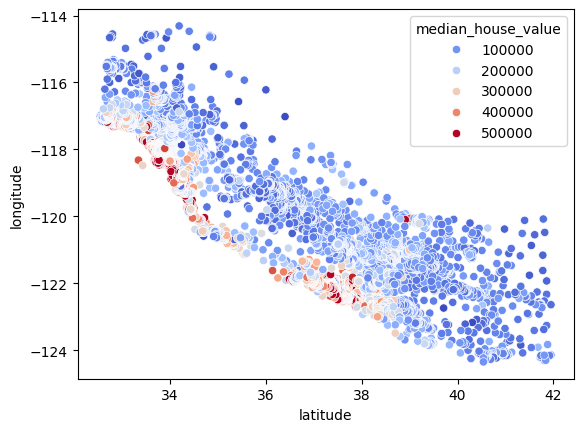

In [4]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value",
               palette="coolwarm")

TypeError: cannot convert the series to <class 'float'>

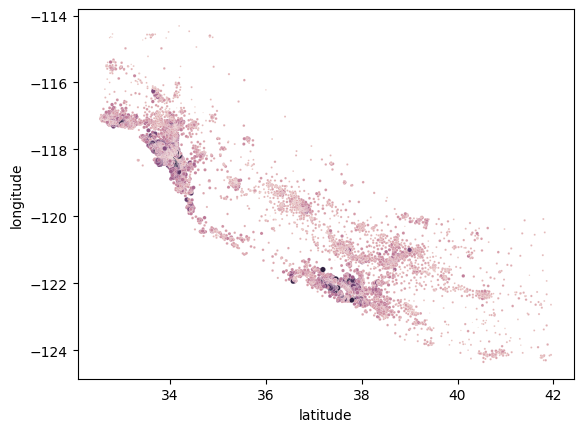

In [9]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_income",
               s=datos["median_income"])

In [10]:
datos.loc[:,["latitude", "longitude", "median_income"]]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [24]:
from sklearn.cluster import KMeans

X=datos.loc[:,["latitude", "longitude", "median_income"]]
modelo=KMeans(n_clusters=6)
predicciones=modelo.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
predicciones

array([1, 1, 1, ..., 4, 4, 4], dtype=int32)

In [26]:
predicciones.shape

(20640,)

In [27]:
X["segmento_economico"]=predicciones

In [28]:
X

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,1
1,37.86,-122.22,8.3014,1
2,37.85,-122.24,7.2574,1
3,37.85,-122.25,5.6431,1
4,37.85,-122.25,3.8462,4
...,...,...,...,...
20635,39.48,-121.09,1.5603,4
20636,39.49,-121.21,2.5568,4
20637,39.43,-121.22,1.7000,4
20638,39.43,-121.32,1.8672,4


In [29]:
X["segmento_economico"].value_counts()

segmento_economico
2    6922
4    4841
0    3922
1    2802
5    1685
3     468
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

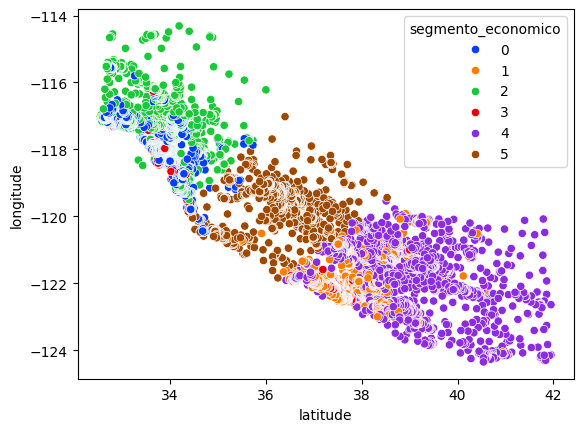

In [31]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=X, hue="segmento_economico",
               palette="bright")

<Axes: xlabel='segmento_economico', ylabel='count'>

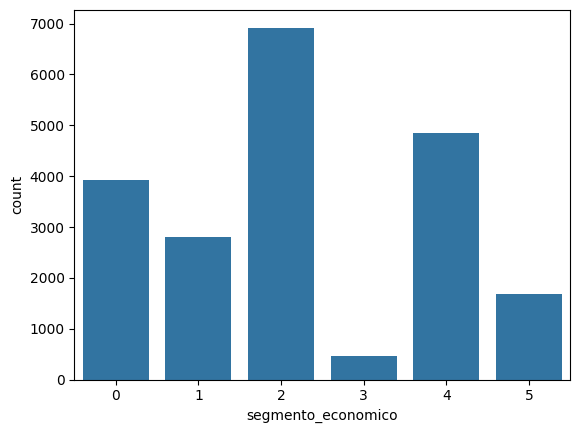

In [33]:
sb.countplot(x="segmento_economico", data=X)

In [34]:
X.groupby(["segmento_economico"])["median_income"].mean()

segmento_economico
0     5.478612
1     5.501337
2     2.856481
3    10.898552
4     2.813804
5     2.667109
Name: median_income, dtype: float64